## Model definition:

 Given: $x_1, ..., x_n$ where each $x \in R^d$.


Goal: Minimize $L = \sum\nolimits_{i = 1}^n {{{\left\| {{x_i} - {\mu _{c_i}}} \right\|} }^2}. $


with $\mu_k$ being the centroid and $c_i$ being the cluster. $c_i \in \{1,..., k\}$ for $i \in \{ 1, ...,n\}$. 

## How to fit it:

- Randomly initialize $\mu  = \left( {{\mu _1},...,{\mu _K}} \right).$

- Iterate until $c$ and $\mu$ stop changing:


1. Update each $c_i$: set

$${c_i} = \arg \mathop {\min }\limits_k {\left\| {{x_i} - {\mu _k}} \right\|^2}$$
  
2. Update each ${\mu}_k$: set
  $$\,\,\,{\mu _{c_i}} = \frac{1}{{{n_k}}}\sum\limits_{i = 1}^n {{x_i}1\left\{ {c_i = k} \right\}} $$
  
  with $n_k$ being the number of elements in the cluster $k$.


## How to use it:

To make the prediction, we will calculate the distances between the testing point and the centroids. After that, we will get the label which its centroid is closest to the testing point.


## K- means for 3 clusters

In [64]:
import numpy as np
class Kmeans():
    def __init__(self, k):
        self.k = k
    
    def fit(self,X):
        self.X = X
        X = self.X
        self.n_points = X.shape[0] 
        random_idx = np.random.choice(self.n_points, self.k, replace = False)
        self.centroids = X[random_idx]
        self.clusters = {i:[] for i in range(self.k)}
        
        while True:
            #update the cluster
            clusters = {i:[] for i in range(self.k)}
            for idx, point in enumerate(X):
                distances = np.sum((point - self.centroids)**2, axis = 1)
                centroid_idx = np.argmin(distances)
                clusters[centroid_idx].append(idx)  #cluster = {cluster__idx = points_index}
            self.clusters = clusters
            centroids_old = self.centroids.copy()
           
            #update the centroids
            for cluster_idx in self.clusters:
                cluster_mean = np.mean(X[self.clusters[cluster_idx]], axis = 0)
                self.centroids[cluster_idx] = cluster_mean

            check_distances = [np.sum((centroids_old[i] - self.centroids[i])**2) for i in range(self.k)]
            if sum(check_distances) == 0:
                break
            
        for i in range(self.k):
            plt.scatter(self.centroids[i][0],self.centroids[i][1])
            plt.scatter(X[self.clusters[i]][:,0],X[self.clusters[i]][:,1])

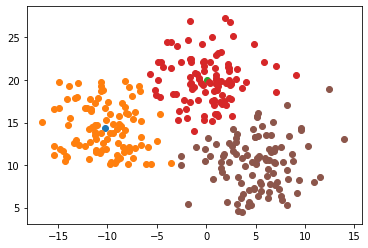

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
clustering = Kmeans(3)
n = 100
j= 10
x1, y2 = np.random.multivariate_normal([-10,10], [[j,0],[0,j]], n).T

x2, y2 = np.random.multivariate_normal([0,20], [[j,0],[0,j]], n).T
x3, y3 = np.random.multivariate_normal([5,10], [[j,0],[0,j]], n).T
"""
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
"""
x = np.append(x1,x2)
x = np.append(x,x3)
y = np.append(y1,y2)
y = np.append(y,y3)
X = np.stack((x,y), axis = -1)
#plt.scatter(X[:,0],X[:,1])

clustering = clustering.fit(X)

## Predictions of Digit recognizer 

In [112]:
import numpy as np
class Kmeans():
    def __init__(self, k):
        self.k = k
    
    def fit(self,X):
        self.X = X
        X = self.X
        self.y = y
        self.n_points = X.shape[0] 
        random_idx = np.random.choice(self.n_points, self.k, replace = False)
        self.centroids = X[random_idx]
        self.clusters = {i:[] for i in range(self.k)}
        
        while True:
            #update the cluster
            clusters = {i:[] for i in range(self.k)}
            for idx, point in enumerate(X):
                distances = np.sum((point - self.centroids)**2, axis = 1)
                centroid_idx = np.argmin(distances)
                clusters[centroid_idx].append(idx)  #cluster = {cluster__idx = points_index}
            self.clusters = clusters
            centroids_old = self.centroids.copy()
           
            #update the centroids
            for cluster_idx in self.clusters:
                cluster_mean = np.mean(X[self.clusters[cluster_idx]], axis = 0)
                self.centroids[cluster_idx] = cluster_mean

            check_distances = [np.sum((centroids_old[i] - self.centroids[i])**2) for i in range(self.k)]
            if sum(check_distances) == 0:
                break

    def predict(self, x):
        distances = np.sum((x - self.centroids)**2, axis = 1)
        centroid_idx = np.argmin(distances)
        return centroid_idx


In [113]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("../data/digit-recognizer/data/train.csv")
df_test = pd.read_csv("../data/digit-recognizer/data/test.csv")
train = df_train.to_numpy()
X = train[:,1:]
y = train[:,0]
clustering = Kmeans(10)
clustering.fit(X)

f = open("../data/digit-recognizer/outputs/submission_kmeans.csv", "w")
f.write("ImageId,Label\n" )
test = df_test
test = test.to_numpy()
for i in range(len(test)):
    a = clustering.predict(test[i])
    f.write(str(i+1) + "," + str(a) +"\n")
f.close()